<a href="https://colab.research.google.com/github/khushisharmacs28-cloud/DeepLearning_2025-26_KhushiSharma/blob/main/SME16_02_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#SNN

In [5]:
# Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Creating a dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 1, 1, 0])

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Build Neural Network Model
model = Sequential()

# Hidden layer
model.add(Dense(units=4, activation='relu', input_dim=2))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=1,
    verbose=0

)

# Evaluate model
loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy:", accuracy)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.0000e+00 - loss: 1.2900
Accuracy: 0.0


In [8]:
# Example student
# Hours studied = 6
# Attendance = 75%

new_student = np.array([[6, 0.75]])

# Scale input
new_student_scaled = scaler.transform(new_student)

# Predict
prediction = model.predict(new_student_scaled)

print("\nPrediction Probability:", prediction[0][0])

if prediction[0][0] > 0.5:
    print("Prediction: Pass")
else:
    print("Prediction: Fail")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step

Prediction Probability: 0.57062846
Prediction: Pass


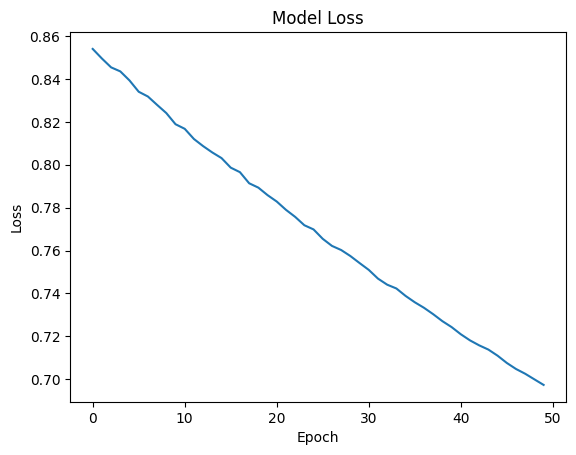

In [11]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

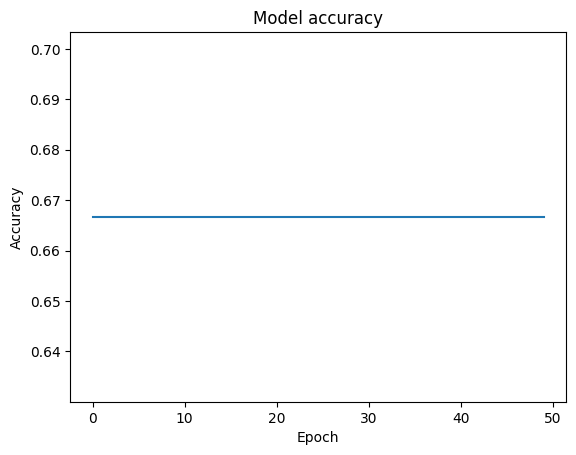

In [12]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [14]:
print("/nModel Summary:")
model.summary()

/nModel Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53 (216.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36 (148.00 B)

In [ ]:
#CNN

In [1]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix

In [3]:
#Load Dataset

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
#Normalize Data
# Normalizing pixel Range from 0-255 to 0-1
xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [6]:
import matplotlib.pyplot as plt

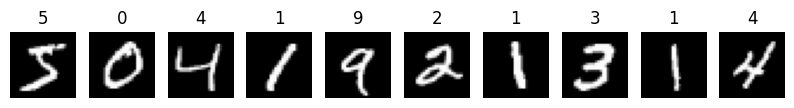

In [17]:
# Visualization of 1st 10 training data

plt.figure(figsize=(10,2))
for i in range (10):
  plt.subplot(1,10,i+1) # Corrected to display different subplots
  plt.imshow(xtrain[i],cmap="gray") # Corrected to display different images
  plt.title(ytrain[i])
  plt.axis("off")
plt.show()

In [15]:
from tensorflow.keras.layers import Input # Import the Input layer

model = Sequential([
                   Input(shape=(28,28)), # Use Input layer as the first layer
                   Flatten(), # No need for input_shape here
                   Dense(128, activation='relu'), # hidden Layer
                   Dense(10, activation='softmax') # output Layer
                   ])

In [11]:
#Compilation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history=model.fit(xtrain, ytrain, epochs=5, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8713 - loss: 0.4604 - val_accuracy: 0.9673 - val_loss: 0.1228
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9628 - loss: 0.1307 - val_accuracy: 0.9683 - val_loss: 0.0969
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9756 - loss: 0.0825 - val_accuracy: 0.9758 - val_loss: 0.0794
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9825 - loss: 0.0578 - val_accuracy: 0.9790 - val_loss: 0.0765
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9864 - loss: 0.0437 - val_accuracy: 0.9758 - val_loss: 0.0803


In [13]:
ypred=model.predict(xtest)

ypred_classes=np.argmax(ypred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


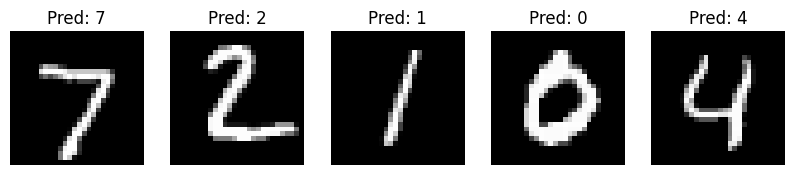

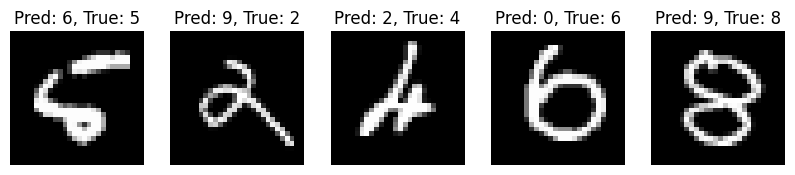

In [16]:
# correct predictions

correct = np.where(ypred_classes == ytest)[0]

plt.figure(figsize=(10,4))

for i, idx in enumerate(correct[:5]):

    plt.subplot(1, 5, i + 1)

    plt.imshow(xtest[idx], cmap='gray')

    plt.title(f"Pred: {ypred_classes[idx]}")

    plt.axis("off")

plt.show()

#incorrect predictions

incorrect = np.where(ypred_classes != ytest)[0]

plt.figure(figsize=(10,4))

for i, idx in enumerate(incorrect[:5]):

    plt.subplot(1, 5, i + 1)

    plt.imshow(xtest[idx], cmap='gray')

    plt.title(f"Pred: {ypred_classes[idx]}, True: {ytest[idx]}") # Added true label for incorrect predictions

    plt.axis("off")

plt.show()

In [19]:
#LSTM

In [18]:
import torch
import torch.nn as nn

In [23]:
lstm = nn.LSTM(input_size=10, hidden_size=20, num_layers=1, batch_first=True)

In [24]:
x = torch.randn(5,7,10)
output, (hn, cn) = lstm(x)

print(output.shape)
print(hn.shape)
print(cn.shape)

torch.Size([5, 7, 20])
torch.Size([1, 5, 20])
torch.Size([1, 5, 20])


In [ ]:
#RNN

In [26]:
import torch
import torch.nn as nn

In [27]:
rnn_cell = nn.RNNCell(input_size=10, hidden_size=20)

In [28]:
# Input: (batch_size=5, sequence_length=7, input_size=10)
x = torch.randn(5, 7, 10)

# Initial hidden state
h = torch.zeros(5, 20)

# Store outputs
outputs = []

In [29]:
for t in range(x.size(1)):
    h = rnn_cell(x[:, t, :], h)
    outputs.append(h.unsqueeze(1))

# Concatenate outputs
output = torch.cat(outputs, dim=1)

print(output.shape)  # (5, 7, 20)
print(h.shape)

torch.Size([5, 7, 20])
torch.Size([5, 20])
